In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
DATA_PATH = '../data/'

In [3]:
fname = DATA_PATH + 'billboard_1970_current.csv'
df = pd.read_csv(fname,sep='@')

In [4]:
## 1 Most listed artists from 1970 - current time
# filtered by aritists listed more than twice

In [5]:
artist_listed_df = df.artist.value_counts()
artist_listed_df = artist_listed_df.loc[artist_listed_df > 2]
display(artist_listed_df)

Madonna                         35
Elton John                      26
Mariah Carey                    25
Michael Jackson                 22
Rihanna                         21
Taylor Swift                    21
Janet Jackson                   21
Whitney Houston                 20
Daryl Hall and John Oates       18
Stevie Wonder                   18
Kelly Clarkson                  17
Britney Spears                  15
Chicago                         15
R. Kelly                        14
Usher                           14
Rod Stewart                     14
Katy Perry                      14
The Black Eyed Peas             13
P!nk                            13
Phil Collins                    13
Beyonce                         13
Kool and The Gang               13
Boyz II Men                     13
Bee Gees                        12
Eminem                          12
Lionel Richie                   12
Aerosmith                       12
Billy Joel                      12
Justin Timberlake   

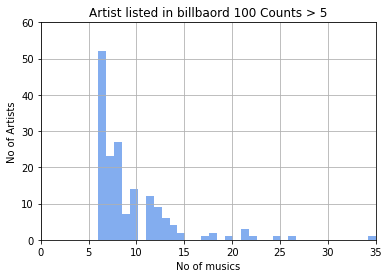

In [6]:
artist_count_tmp_df = df.artist.value_counts()[(df.artist.value_counts() > 5)]
# filtered by more than five to see more relevant data

plt.hist(artist_count_tmp_df, 35, facecolor='#83adef')
plt.xlabel('No of musics')
plt.ylabel('No of Artists')
plt.title('Artist listed in billbaord 100 Counts > 5')
plt.axis([0, 35, 0, 60])
plt.grid(True)

In [7]:
# Most heated artist of the year
d = {}
year_list = []
artist_list = []
cnt_list = []

df_grp = df.groupby(['year', 'artist'])
for tmp in df_grp.groups:
    year, artist = tmp
    songs = df_grp.groups[tmp]
    if not (year in d):
        d[year] = {}
    d[year][artist] = len(songs)

for year in d:
    cnt = 0
    for artist in d[year]:
        if (d[year][artist] > cnt):
            cnt = max(d[year][artist],cnt)
            artist_popular = artist
    year_list.append(year)
    artist_list.append(artist_popular)
    cnt_list.append(cnt)

d = {'year':year_list,'artist':artist_list,'cnt':cnt_list}
most_artist_year_df = pd.DataFrame(data=d) 
most_artist_year_df[['year','artist','cnt']]

,year,artist,cnt
0,1970,Jackson 5,4
1,1971,Carpenters,3
2,1972,Al Green,3
3,1973,Stevie Wonder,3
4,1974,Elton John,3
5,1975,Elton John,3
6,1976,Barry Manilow,2
7,1977,Fleetwood Mac,3
8,1978,Andy Gibb,3
9,1979,Bee Gees,3


In [13]:
def cloudByArtist(artist):
    lyric=""
    for r in df[df.artist==artist].iterrows():
        lyric = lyric + str(r[1]['lyric'])
    wordcloud = WordCloud(background_color="white",max_words=30,stopwords=STOPWORDS)
    wordfreq = wordcloud.process_text(lyric)
    wordcloud.generate_from_frequencies(wordfreq)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

1970 Jackson 5


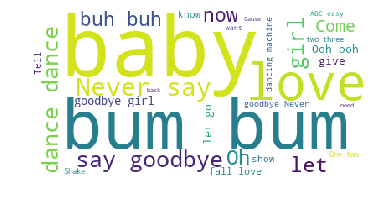

1980 Eagles


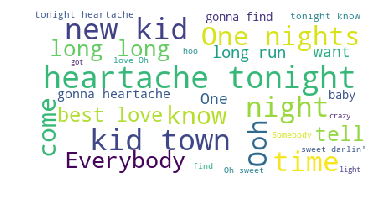

1990 Janet Jackson


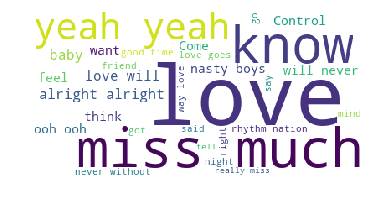

2000 Christina Aguilera


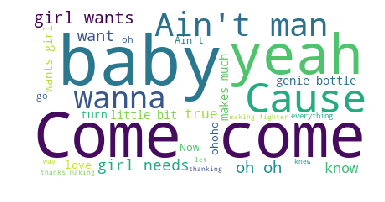

2010 The Black Eyed Peas


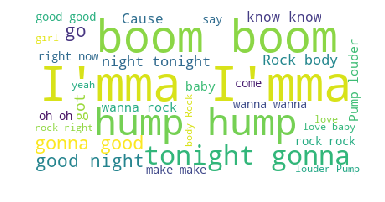

In [14]:
for i in range(0,len(year_list),10):
    print(year_list[i],artist_list[i])
    cloudByArtist(artist_list[i])

In [10]:
## Explore through the most heated-artists of each year
## Here, found out the artist whose popularity is relatively higher than other 
# i.e. artist listed on the year-end hot list more than four times

1970 Jackson 5 chart_cnt: 4


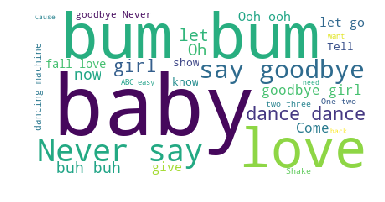

1983 Michael Jackson chart_cnt: 4


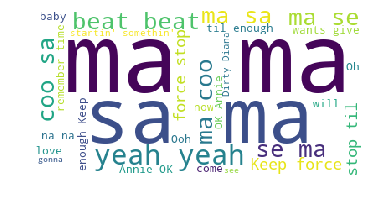

1984 Lionel Richie chart_cnt: 4


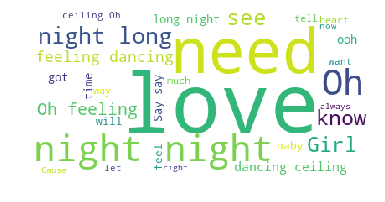

1985 Madonna chart_cnt: 5


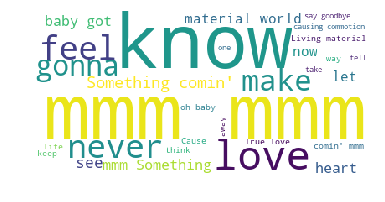

1987 Madonna chart_cnt: 4


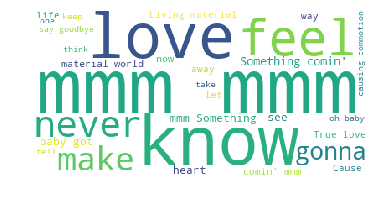

1988 George Michael chart_cnt: 5


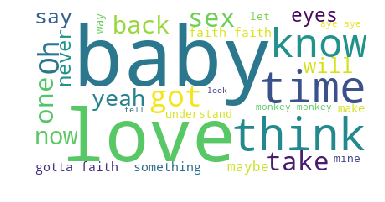

1989 Bobby Brown chart_cnt: 5


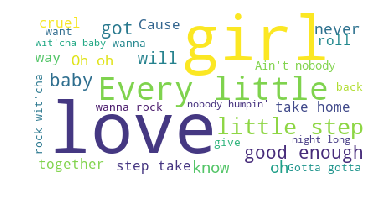

1990 Janet Jackson chart_cnt: 5


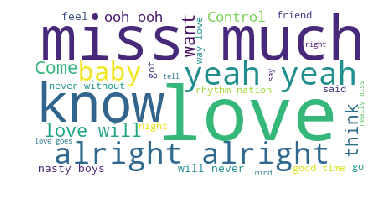

1991 Mariah Carey chart_cnt: 4


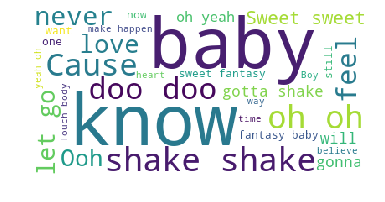

1995 Boyz II Men chart_cnt: 4


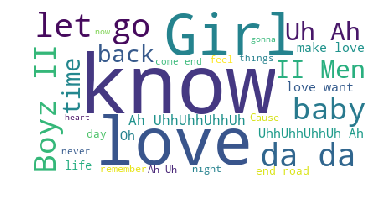

2005 Kelly Clarkson chart_cnt: 4


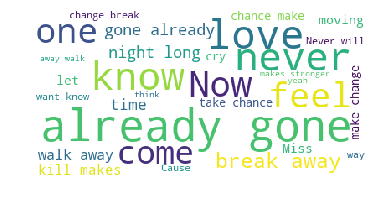

2007 Justin Timberlake chart_cnt: 4


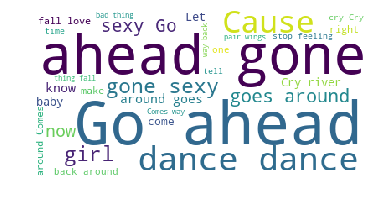

2009 Beyonce chart_cnt: 5


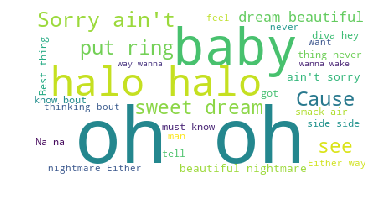

2010 The Black Eyed Peas chart_cnt: 4


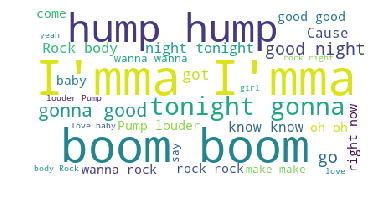

2012 Adele chart_cnt: 4


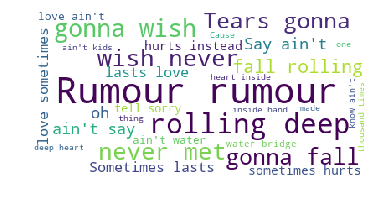

2015 Taylor Swift chart_cnt: 4


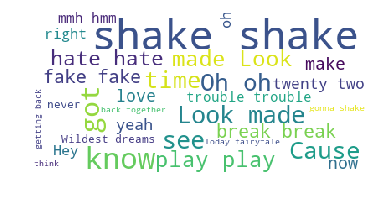

In [15]:
for i in range(0,len(year_list)):
    if cnt_list[i] >= 4: 
        print(year_list[i],artist_list[i], 'chart_cnt:', cnt_list[i])
        cloudByArtist(artist_list[i])

In [12]:
## Interesting finding
# As time proceeds, it is noticed that the words in the wordcloud is less and less sparce (more repetition) excpet for Adele
# Good example of least song would be Eagles 